# Objective
The goal of Milestone 3 is to generate code to randomly remove some data to replicate incomplete data, and then determine the accuracy of the coding to determine the opening move with missing data. This code begins by randomly generating the data removed and then applies the pattern recognition framework to assess its accuracy in identifying chess openings from incomplete game records. 

# Step 1: Import Libraries and Setup

This section imports the necessary libraries for data manipulation and visualisation. 

The sys library is used to modify the system path to include the directory where the ChessOpeningMapper module is located.


In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sys
import zipfile
import os
import numpy as np
import random
from sklearn.model_selection import train_test_split

# Add the path to the directory where ChessOpeningMapper.py is located. I had issues with the path, 
# so I went with the relative path. This will have to change.
sys.path.append(r'Sprint 2')

# Import ChessOpeningMapper
from ChessOpeningMapper import ChessOpeningMapper



# Step 2: Load Opening Moves and Create Trie Structure.
# 
In this step, an instance of ChessOpeningMapper is created.

A list of file paths to the TSV files containing chess openings is defined.

These TSV files are merged into a single DataFrame using merge_tsv_files.

The PGN strings are split into individual moves using split_pgn_to_columns.

A Trie structure is created from the opening moves using create_trie.

In [36]:
# Create an instance of ChessOpeningMapper
mapper = ChessOpeningMapper()

# Define a list of file paths to the TSV files containing chess openings, I had issues with the path, so I have mapped them manually. 
file_list = [
    r'Chess Pattern Recognition\a.tsv',
    r'Chess Pattern Recognition\b.tsv',
    r'Chess Pattern Recognition\c.tsv',
    r'Chess Pattern Recognition\d.tsv',
    r'Chess Pattern Recognition\e.tsv'
]

# Merge the TSV files into a single DataFrame
opening_moves = mapper.merge_tsv_files(file_list)

# Split the PGN strings into individual moves
opening_moves = mapper.split_pgn_to_columns(opening_moves)

# Create a Trie structure from the opening moves
mapper.create_trie(opening_moves)

# Display the first few rows of the opening moves DataFrame
print("Opening Moves DataFrame:")
print(opening_moves.head())

Opening Moves DataFrame:
   eco                                     name  \
0  A00                             Amar Opening   
1  A00               Amar Opening: Paris Gambit   
2  A00  Amar Opening: Paris Gambit, Gent Gambit   
3  A00                         Amsterdam Attack   
4  A00                      Anderssen's Opening   

                                                 pgn Move_ply_1 Move_ply_2  \
0                                             1. Nh3        Nh3       None   
1                           1. Nh3 d5 2. g3 e5 3. f4        Nh3         d5   
2  1. Nh3 d5 2. g3 e5 3. f4 Bxh3 4. Bxh3 exf4 5. ...        Nh3         d5   
3             1. e3 e5 2. c4 d6 3. Nc3 Nc6 4. b3 Nf6         e3         e5   
4                                              1. a3         a3       None   

  Move_ply_3 Move_ply_4 Move_ply_5 Move_ply_6 Move_ply_7  ... Move_ply_28  \
0       None       None       None       None       None  ...        None   
1         g3         e5         f4       None

# Step 3: Unzip and Load Chess Game Data
This step involves:

Defining the path to the zipped game data file.

Unzipping the game data file to extract the CSV file.

Loading the extracted CSV file into a DataFrame.

In [37]:
# Define the path to the zipped game data file
game_data_zip_path = r'Chess Pattern Recognition\chessdata.zip'

# Define the name of the extracted CSV file
extracted_file_name = 'chessdata.csv'

# Unzip the game data file
ChessOpeningMapper.unzip_game_data(zip_path=game_data_zip_path, extract_to='.')

# Load the extracted CSV file into a DataFrame
game_data = ChessOpeningMapper.load_game_data(zip_path=game_data_zip_path, extracted_file_name=extracted_file_name)

# Display the first few rows of the game data DataFrame
print("Game Data DataFrame:")
print(game_data.head())


c:\Users\jenni\Desktop\jn\uni\capstone 1\Sprint 2\ChessOpeningMapper.py:104: DtypeWarning: Columns (188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403,404,405,406,407,408) have mixed types. Specify dtype option on import or set low_memory=False.
  game_data = pd.read_csv(extracted_file_name)


Game Data DataFrame:
   Index        Date  ECO                                 Opening Result  \
0      0  2019.04.30  B15                       Caro-Kann Defense    0-1   
1      1  2019.04.30  C50                            Italian Game    0-1   
2      2  2019.04.30  C41                     Philidor Defense #2    1-0   
3      3  2019.04.30  B06                          Modern Defense    0-1   
4      4  2019.04.30  B32  Sicilian Defense: Loewenthal Variation    1-0   

  Termination TimeControl     UTCDate   UTCTime Move_ply_1  ... Clock_ply_192  \
0      Normal       300+3  2019.04.30  22:00:24         d4  ...           NaN   
1      Normal       300+0  2019.04.30  22:00:13         e4  ...           NaN   
2      Normal       600+0  2019.04.30  22:00:41         e4  ...           NaN   
3      Normal        60+0  2019.04.30  22:00:43         e4  ...           NaN   
4      Normal       180+0  2019.04.30  22:00:46         e4  ...           NaN   

  Clock_ply_193 Clock_ply_194 Clock

# Step 4: Map Opening Names to Game Data

Here:

The game data is processed to map the move sequences to opening names using get_opening_name_from_game.

The mapped opening names are added to the original game data DataFrame in a new column called mapped_opening.


In [38]:
# Map the opening names to the game data
result_df = mapper.get_opening_name_from_game(game_data)

# Add the mapped opening names to the original game data DataFrame
game_data['mapped_opening'] = result_df['opening_name']

# Display the first 5 rows of the updated game data DataFrame
print(f"First 5 rows with mapped openings: \n{game_data.head()}")

First 5 rows with mapped openings: 
   Index        Date  ECO                                 Opening Result  \
0      0  2019.04.30  B15                       Caro-Kann Defense    0-1   
1      1  2019.04.30  C50                            Italian Game    0-1   
2      2  2019.04.30  C41                     Philidor Defense #2    1-0   
3      3  2019.04.30  B06                          Modern Defense    0-1   
4      4  2019.04.30  B32  Sicilian Defense: Loewenthal Variation    1-0   

  Termination TimeControl     UTCDate   UTCTime Move_ply_1  ... Clock_ply_193  \
0      Normal       300+3  2019.04.30  22:00:24         d4  ...           NaN   
1      Normal       300+0  2019.04.30  22:00:13         e4  ...           NaN   
2      Normal       600+0  2019.04.30  22:00:41         e4  ...           NaN   
3      Normal        60+0  2019.04.30  22:00:43         e4  ...           NaN   
4      Normal       180+0  2019.04.30  22:00:46         e4  ...           NaN   

  Clock_ply_194 Cloc

# Step 5: Train/Test Split

Here: 

Split the dataset into training and test sets with a 70/30 ratio. Display the sizes of the train and test datasets to verify the split.

In [39]:
# Step 4: Train/Test Split
# Split the dataset into training and test sets (70/30)
train_df, test_df = train_test_split(game_data, test_size=0.3, random_state=42)

# Display the sizes of the train and test datasets
print(f"Training data size: {len(train_df)}")
print(f"Testing data size: {len(test_df)}")

Training data size: 140000
Testing data size: 60000


# Step 6: Generate Random Code

Here:

- Define the number of loss values
- Randomly select a number of variables depending on the loss values 
- Rename the random values as move_ply_xx and then drop 


In [40]:
# Generate Random Code and Apply to Both Datasets
def generate_random_move_removal(data, loss=[1, 2, 3, 4, 5, 10, 15, 20, 25, 30]):
    index = 0
    loss_dict = {}
    modified_data = data.copy()

    while index < len(loss):
        random_moves = random.sample(range(1, 36), loss[index])
        loss_dict[f'loss{loss[index]}'] = random_moves
        index += 1

    # Apply one of the generated random sets to the data
    # For demonstration, let's use the 'loss3' set as an example
    drop_columns = {f'Move_ply_{i}' for i in loss_dict['loss3']}
    for i in drop_columns:
        modified_data[i] = None

    return modified_data, loss_dict

# Apply random move removal to training and testing datasets
train_data3, train_loss_dict = generate_random_move_removal(train_df)
test_data3, test_loss_dict = generate_random_move_removal(test_df)

print("Sample of training data after random move removal:")
print(train_data3.head())

print("Sample of testing data after random move removal:")
print(test_data3.head())

print("Random moves removed from training data:", train_loss_dict['loss3'])
print("Random moves removed from testing data:", test_loss_dict['loss3'])

Sample of training data after random move removal:
         Index        Date  ECO  \
21269    21269  2019.05.25  A43   
187660  187660  2019.05.20  B32   
774        774  2019.05.01  A04   
184577  184577  2019.05.20  B30   
37127    37127  2019.05.28  D06   

                                                  Opening Result Termination  \
21269               Benoni Defense: Benoni-Indian Defense    0-1      Normal   
187660             Sicilian Defense: Loewenthal Variation    1-0      Normal   
774                Zukertort Opening: Kingside Fianchetto    1-0      Normal   
184577                     Sicilian Defense: Old Sicilian    1-0      Normal   
37127   Queen's Gambit Refused: Marshall Defense, Tan ...    1-0      Normal   

       TimeControl     UTCDate   UTCTime Move_ply_1  ... Clock_ply_193  \
21269       900+15  2019.05.25  20:25:43         d4  ...           NaN   
187660       300+3  2019.05.20  21:48:48         e4  ...           NaN   
774          300+0  2019.05.01   1:

In [41]:
# setting loss rows to 1, 2, 3 etc
#loss = [1, 2, 3, 4, 5, 10, 15, 20, 25, 30]
#index = 0

# select a number of variables based on the number of rows lossed, 
# between 0 and 36 to determine which rows to randomly drop
#### Note- 36 was determined as the longest opening move in the dataset
#while index < len(loss):
 #   globals()['loss%s' % loss[index]] = random.sample(range(1, 36), loss[index])
  #  index += 1

# test example of the loss 3 rows to remove
#print(loss3)


In [42]:
# set loop to make selected values from above to None 
#drop_columns3 = {f'Move_ply_{i}' for i in loss3}
#game_data3 = game_data
#for i in drop_columns3:
#    game_data3[i] = None

# test sample for 3 rows loss 
#print(game_data3)

# Step 7: Prepare Data for Testing

In this step, game data is processed to create sequences from non-null moves, preparing it for pattern recognition testing. This step ensures each game's moves are consolidated into a format suitable for analysis.

In [43]:
# Prepare data by creating move sequences from non-null moves
def prepare_game_data_for_testing(game_data, max_plies=200):
    
    """
    Prepare the game data by creating move sequences from non-null moves.
    
    Args:
    - game_data (pd.DataFrame): The DataFrame with chess moves.
    - max_plies (int): The maximum number of plies to consider (default is 200).
    
    Returns:
    - pd.DataFrame: A DataFrame with a new column 'move_sequence' containing sequences of moves.
    """
    
    move_columns = [f'Move_ply_{i+1}' for i in range(max_plies)]
    selected_moves_df = game_data[move_columns].copy()

    def create_move_sequence(row):
        moves = row.dropna().tolist()  # Drop NaN values and convert to list
        return ' '.join(moves)

    selected_moves_df['move_sequence'] = selected_moves_df.apply(create_move_sequence, axis=1)
    selected_moves_df['mapped_opening'] = game_data['mapped_opening']  # Ensure this column exists
    return selected_moves_df

# Prepare the incomplete game data for testing
processed_train_data = prepare_game_data_for_testing(train_data3)
processed_test_data = prepare_game_data_for_testing(test_data3)

# Debug: Check move sequences
print("Processed train data (with move sequences):\n", processed_train_data.head())
print("Processed test data (with move sequences):\n", processed_test_data.head())

Processed train data (with move sequences):
        Move_ply_1 Move_ply_2 Move_ply_3 Move_ply_4 Move_ply_5 Move_ply_6  \
21269          d4         c5         d5        Nf6       None         g6   
187660         e4         c5        Nf3        Nc6       None       cxd4   
774           Nf3         g6         e4        Bg7       None         e6   
184577         e4         c5        Nf3        Nc6       None         e6   
37127          d4         d5         c4        Nf6       None         c6   

       Move_ply_7 Move_ply_8 Move_ply_9 Move_ply_10  ... Move_ply_193  \
21269         Nc3        Bg7         e4          d6  ...          NaN   
187660       Nxd4         e5        Nf3          d6  ...          NaN   
774           O-O         a5         c3          c6  ...          NaN   
184577         c3         d5       exd5        exd5  ...          NaN   
37127        dxc6       Nxc6        Nf3          e6  ...          NaN   

       Move_ply_194 Move_ply_195 Move_ply_196 Move_ply_197 

# Step 8: Test Pattern Recognition on Incomplete Data

In this step, the ChessOpeningMapper is used to predict chess openings from the processed, incomplete data. The predicted openings are then compared with the actual mapped openings to determine the accuracy of the model, assessing its ability to handle missing data.

In [44]:
# Test pattern recognition on incomplete data
def test_pattern_recognition_on_incomplete_data(mapper, incomplete_df, dataset_label):
    
    """
    Test the pattern recognition on incomplete data using ChessOpeningMapper.
    
    Args:
    - mapper (ChessOpeningMapper): The ChessOpeningMapper instance for mapping openings.
    - incomplete_df (pd.DataFrame): The DataFrame containing incomplete chess move data.
    - dataset_label (str): Label to indicate which dataset is being tested (e.g., 'Training' or 'Testing').
    
    Returns:
    - pd.DataFrame: A DataFrame with the original and predicted openings for comparison.
    """
    
    # Use the mapper to predict openings based on incomplete data
    incomplete_results = mapper.get_opening_name_from_game(incomplete_df)
    incomplete_df['predicted_opening'] = incomplete_results['opening_name']
    
    if 'mapped_opening' in incomplete_df.columns:
        incomplete_df['match'] = incomplete_df['mapped_opening'] == incomplete_df['predicted_opening']
        accuracy = incomplete_df['match'].mean()
        print(f'Accuracy on incomplete {dataset_label} data: {accuracy:.2%}')
    else:
        print(f"No 'mapped_opening' column found in input {dataset_label} data")
    
    return incomplete_df

# Instantiate ChessOpeningMapper and load trie
mapper = ChessOpeningMapper()
opening_moves = mapper.load_openings()
mapper.create_trie(opening_moves)

# Run the test on both training and testing data
train_result_df = test_pattern_recognition_on_incomplete_data(mapper, processed_train_data, "training")
test_result_df = test_pattern_recognition_on_incomplete_data(mapper, processed_test_data, "testing")

# Print results for training data
print("\nTraining Data Results:")
print("-" * 50)
if 'mapped_opening' in train_result_df.columns and 'match' in train_result_df.columns:
    print(train_result_df[['mapped_opening', 'predicted_opening', 'match']].head())
else:
    print("Mapped or Match columns not found in the train result DataFrame")

# Print results for testing data
print("\nTesting Data Results:")
print("-" * 50)
if 'mapped_opening' in test_result_df.columns and 'match' in test_result_df.columns:
    print(test_result_df[['mapped_opening', 'predicted_opening', 'match']].head())
else:
    print("Mapped or Match columns not found in the test result DataFrame")


Accuracy on incomplete training data: 66.95%
Accuracy on incomplete testing data: 94.97%

Training Data Results:
--------------------------------------------------
                                           mapped_opening  \
21269               Benoni Defense: Benoni-Indian Defense   
187660              Sicilian Defense: Löwenthal Variation   
774                Zukertort Opening: Kingside Fianchetto   
184577                     Sicilian Defense: Old Sicilian   
37127   Queen's Gambit Declined: Marshall Defense, Tan...   

                                predicted_opening  match  
21269       Benoni Defense: Benoni-Indian Defense   True  
187660             Sicilian Defense: Old Sicilian  False  
774        Zukertort Opening: Kingside Fianchetto   True  
184577             Sicilian Defense: Old Sicilian   True  
37127   Queen's Gambit Declined: Marshall Defense  False  

Testing Data Results:
--------------------------------------------------
                               mapped_ope

# Step 8: Visualise Pattern Recognition Results

In this step, the accuracy of pattern recognition on incomplete data is visualised. A count plot is generated to show the distribution of matches and mismatches between the predicted and actual chess openings, providing insight into the model's performance.

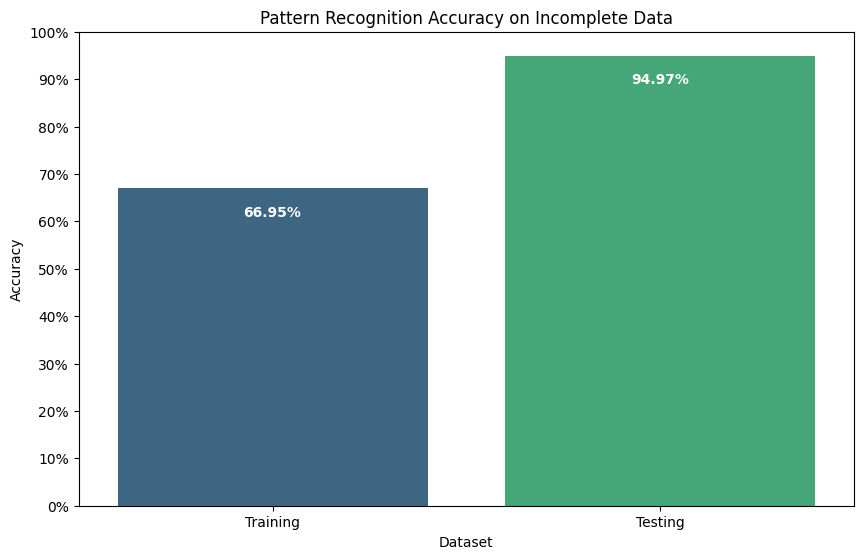

In [46]:
# Visualise pattern recognition results
def visualise_pattern_recognition_results(train_df, test_df):
    
    """
    Visualise the results of pattern recognition on incomplete data.
    
    Args:
    - train_df (pd.DataFrame): DataFrame containing training data results with 'match' column.
    - test_df (pd.DataFrame): DataFrame containing testing data results with 'match' column.
    """
    
    # Calculate accuracy for training and testing data
    train_accuracy = train_df['match'].mean()
    test_accuracy = test_df['match'].mean()

    # Prepare data for visualization
    results = {
        'Dataset': ['Training', 'Testing'],
        'Accuracy': [train_accuracy, test_accuracy]
    }

    # Create a bar plot
    plt.figure(figsize=(10, 6))
    ax = sns.barplot(x='Dataset', y='Accuracy', data=results, palette='viridis', hue='Dataset', dodge=False, legend=False)

    # Add titles and labels
    plt.title('Pattern Recognition Accuracy on Incomplete Data')
    plt.xlabel('Dataset')
    plt.ylabel('Accuracy')
    plt.ylim(0, 1)  # Set y-axis limits from 0 to 1
    plt.yticks(ticks=[i*0.1 for i in range(11)], labels=[f'{i*10}%' for i in range(11)])

    # Display values inside the bars
    for i, v in enumerate(results['Accuracy']):
        ax.text(i, v - 0.05, f'{v:.2%}', ha='center', va='center', color='white', fontweight='bold')

    # Adjust layout to prevent clipping
    plt.subplots_adjust(top=0.9)

    plt.show()

# Call the visualisation function
visualise_pattern_recognition_results(train_result_df, test_result_df)